In [2]:
import pandas as pd

data = pd.read_csv('data.csv')

column_dict = {
    "What year are you in?": "current_year",
    "What faculty are you in?": "faculty", 
    "What was your high school average when you applied to the University of Waterloo?": "hs_average",
    "What is your nationality status?": "nationality_status",
    "What is the highest education level your parents have completed?  [Parent 1]": "parent1_education",
    "What is the highest education level your parents have completed?  [Parent 2]": "parent2_education",
    "On average, how much time do you spend per week participating in social activities during an academic term? (i.e. extracurricular activities, movies, eating out, bars, parties, hanging out, etc.)": "social_time",
    "On average, what percentage of classes do you feel that you attend during an academic term? ": "class_attendance",
    "On average, excluding studying, how much time do you spend looking at a screen, during an academic term? (i.e. Phone, Laptop, TV, etc) ": "screen_time",
    "On average, how much sleep do you get per night during an academic term? ": "sleep_time",
    "On average, how many days do you exercise each week during an academic term?": "excercise_time",
    "On average, how much time do you spend doing school work / studying on a given day during an academic term?": "school_work_time",
    "In relation to school work, how much time do you spend on coop preparation during an academic term? (ie. applications. interview prep. practice, interviews, etc)": "coop_time",
    "Is it a high priority for you to achieve an 80%+ average": "academic_priority",
    'What is your current cumulative average?': "current_average"
}
nationality_dict = {
    'International (You are not a Canadian Citizen and are here on a Visa)':'Internationl',
    '1st Generation Canadian Citizen (You were not born in Canada and You are a Canadian Citizen)':'1st_Gen',
    '2nd+ Generation Canadian Citizen (You were born in Canada and you are a Canadian Citizen)':'2nd+_Gen'
}
sleep_dict = {
    "Not enough (I'm always tired)":"Not Enough",
    "Enough (I'm rested most of the time)":"Enough",
    "More than enough (I'm always well rested)":"More than Enough"
}
screen_dict = {
    'Regularly, but not a significant amount':'Regularly',
    "I'm almost always looking at a screen":'Almost Always',
    'A significant amount':'A significant amount',
    'Almost never':'Almost never'
}
coop_dict = {
    'Almost none':'Almost none',
    'About the same if not more as school work':"Same or More",
    'A significant amount but still less than school work':'Significant,but less than school',
    'A lot less than school work':'A lot less than school work' 
}
social_dict = {
    'Once or twice a week':'Once/Twice Weekly',
    'Multiple days a week':'Multiple Weekly',
    'Rarely':'Rarely'
}
data = data.rename(index=str,columns = column_dict)
for i in range(0,12):
    data.faculty[i]='Engineering'
data = data.drop(axis=1,columns=["Enter your email address OR phone number if you'd like to be entered for a chance to win 1 of 4 $20 amazon gift cards"])
data.nationality_status = data.nationality_status.map(nationality_dict)
data.sleep_time = data.social_time.map(sleep_dict)
data.social_time = data.social_time.map(social_dict)
data.coop_time = data.coop_time.map(coop_dict)
data.screen_time = data.screen_time.map(screen_dict)

print(data.head())

print("test -Jon")



/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


            Timestamp  current_year      faculty hs_average  \
0  11/8/2018 11:01:23             3  Engineering     85-89%   
1  11/8/2018 11:01:46             3  Engineering     90-94%   
2  11/8/2018 11:02:04             3  Engineering     85-89%   
3  11/8/2018 11:04:36             3  Engineering     90-94%   
4  11/8/2018 11:05:08             3  Engineering     85-89%   

  nationality_status parent1_education parent2_education        social_time  \
0           2nd+_Gen     Undergraduate           College  Once/Twice Weekly   
1           2nd+_Gen     Undergraduate     Undergraduate             Rarely   
2           2nd+_Gen     Undergraduate           College  Once/Twice Weekly   
3            1st_Gen           College     Undergraduate             Rarely   
4            1st_Gen     Post-Graduate     Post-Graduate  Once/Twice Weekly   

  class_attendance           screen_time sleep_time excercise_time  \
0       Almost all             Regularly        NaN     2 - 3 days   
1     

# Exploring Data Through Pie Charts

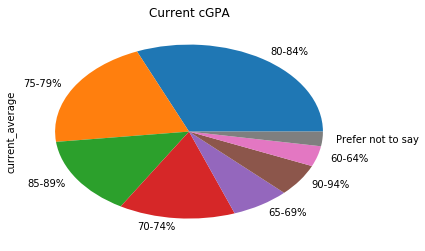

In [29]:
data['current_average'].value_counts().plot(kind='pie',title='Current cGPA')

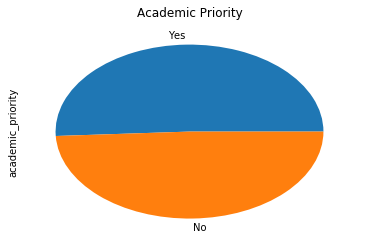

In [30]:
data['academic_priority'].value_counts().plot(kind='pie',title='Academic Priority')